<a href="https://colab.research.google.com/github/Bishre313/testing/blob/main/practice_himself_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

In [ ]:
car_price=pd.read_csv('/content/car_prediction_data.csv')
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_price.shape

(301, 9)

In [ ]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_price.duplicated().sum()

np.int64(2)

#pree processing


In [ ]:
car_price=car_price.drop_duplicates()

In [ ]:
car_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_price.duplicated().sum()

np.int64(0)

In [ ]:
car_price.replace('?',np.nan,inplace=True)

In [ ]:
car_price.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


#out layes

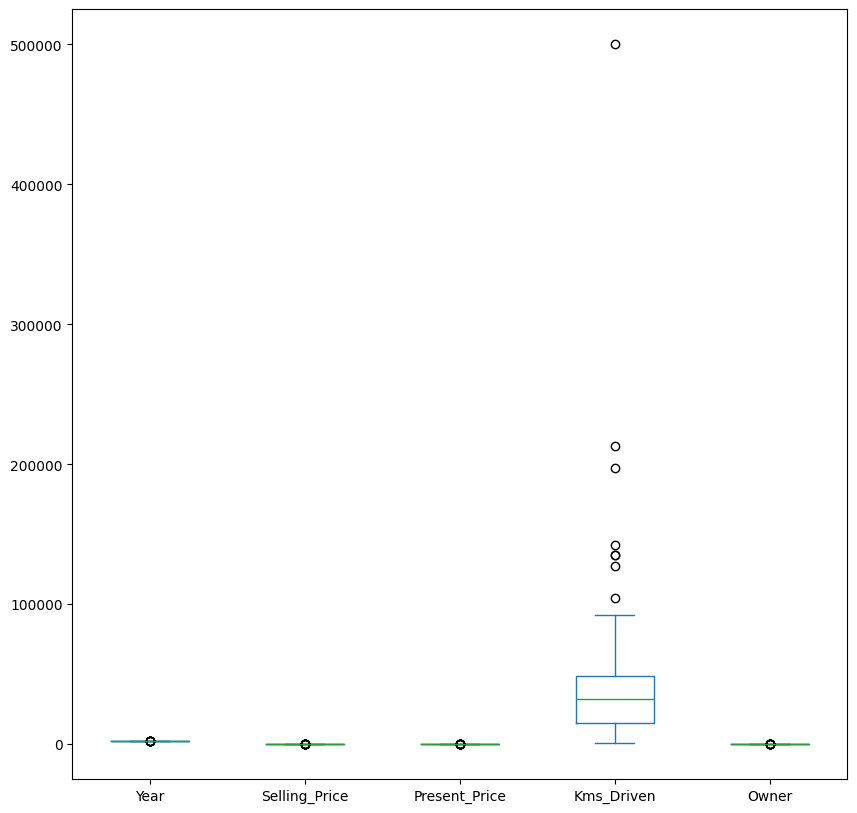

In [ ]:
data=car_price.plot(kind='box',figsize=(10,10))

#handling outlayers

In [ ]:
outlayers= ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

for i in outlayers:
  q1=np.percentile(car_price[i],25)
  q3=np.percentile(car_price[i],75)
  iqr=q3-q1

  up_val=q3+(1.5*iqr)
  low_val=q1-(1.5*iqr)
#clipping
  car_price[i]=car_price[i].clip(lower=low_val,upper=up_val)

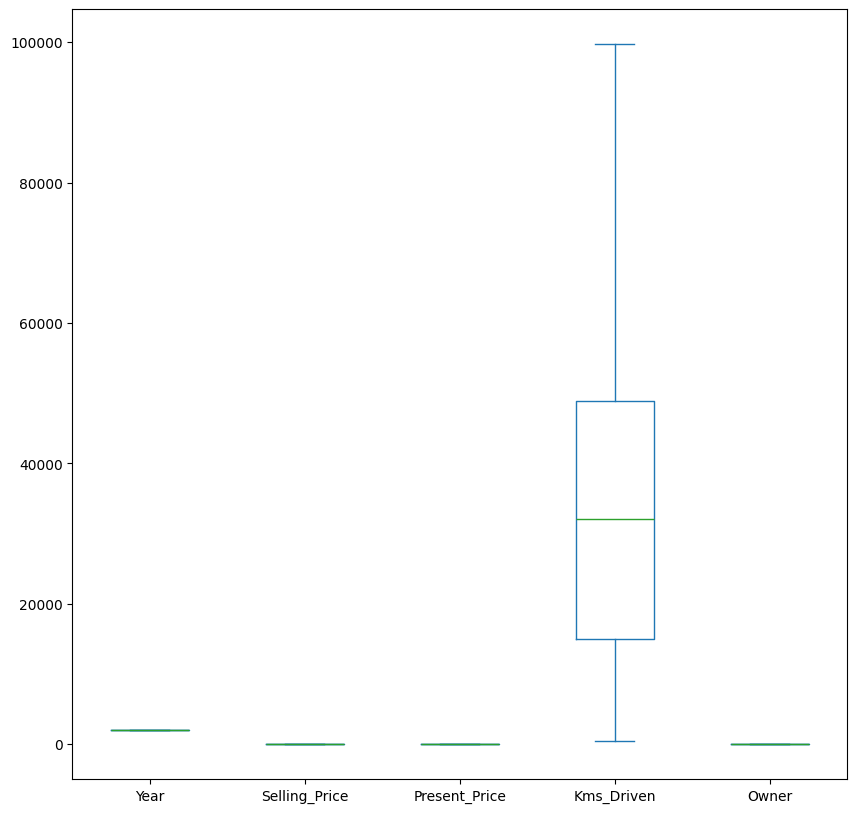

In [ ]:
data=car_price.plot(kind='box',figsize=(10,10))

#encoding

In [ ]:
car_price=car_price.select_dtypes(include=['number'])
corr=car_price.corr()
corr



,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.281223,-0.039317,-0.641909,NaN
Selling_Price,0.281223,1.000000,0.868861,0.126259,NaN
Present_Price,-0.039317,0.868861,1.000000,0.388529,NaN
Kms_Driven,-0.641909,0.126259,0.388529,1.000000,NaN
Owner,NaN,NaN,NaN,NaN,NaN


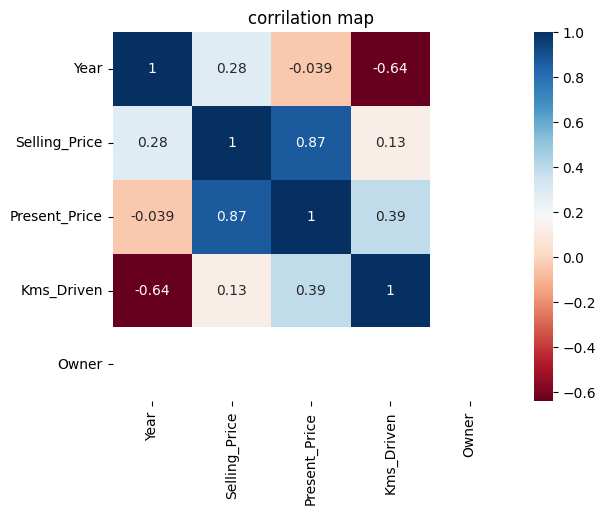

In [ ]:
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.title("corrilation map")
plt.show()



In [ ]:
car_priced=car_price.drop('Year',axis=1)
car_priced
#ivide problem undd


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000.0,0
1,2013,4.75,9.54,43000.0,0
2,2017,7.25,9.85,6900.0,0
3,2011,2.85,4.15,5200.0,0
4,2014,4.60,6.87,42450.0,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,0
297,2015,4.00,5.90,60000.0,0
298,2009,3.35,11.00,87934.0,0
299,2017,11.50,12.50,9000.0,0


In [ ]:
car_price.nunique()

,0
Year,13
Selling_Price,142
Present_Price,140
Kms_Driven,199
Owner,1


In [ ]:
# one hot method
car_price_encoded=pd.get_dummies(car_price,drop_first=True)
car_price_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000.0,0
1,2013,4.75,9.54,43000.0,0
2,2017,7.25,9.85,6900.0,0
3,2011,2.85,4.15,5200.0,0
4,2014,4.60,6.87,42450.0,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,0
297,2015,4.00,5.90,60000.0,0
298,2009,3.35,11.00,87934.0,0
299,2017,11.50,12.50,9000.0,0


#scaling

In [ ]:
scaler =StandardScaler()
scaled_data=scaler.fit_transform(car_price_encoded)
scaled_data

array([[ 0.12443426, -0.2374118 , -0.23253331, -0.31064265,  0.        ],
       [-0.23678752,  0.13884451,  0.4168412 ,  0.36219032,  0.        ],
       [ 1.20809958,  0.81073079,  0.46780477, -1.15588906,  0.        ],
       ...,
       [-1.68167461, -0.2374118 ,  0.65686317,  2.25175759,  0.        ],
       [ 1.20809958,  1.95293745,  0.90346109, -1.06757973,  0.        ],
       [ 0.8468778 ,  0.28665949, -0.18156974, -1.21627581,  0.        ]])

#split

In [ ]:
X=car_price.drop('Present_Price', axis=1)
y=car_price("Present_Price")

TypeError: 'DataFrame' object is not callable